# Assignment 2
## Sungwon Lee
### 017473950

## 1. (3 pts) Implanting K-means clustering algorithm

In [2]:
# Import only basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import norm


df = pd.read_csv('cluster_data1.csv')
df.head()

,X1,X2,X3,X4
0,6.7,3.0,5.0,1.7
1,6.3,2.9,5.6,1.8
2,5.6,3.0,4.5,1.5
3,7.6,3.0,6.6,2.1
4,6.0,3.4,4.5,1.6


In [11]:
seed = 123
k = 3

# set the global random seed as 123
np.random.seed(seed)

def cluster(k):
    for i in range(k):
        
        pass
    

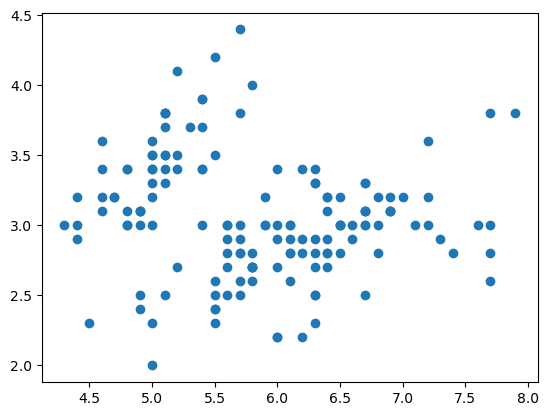

In [5]:
plt.scatter(df.X1, df.X2)
plt.show()

In [12]:
idx = np.random.permutation(df.shape[0])

In [17]:
init_centroid = df.iloc[idx[:k]]

In [18]:
init_centroid

,X1,X2,X3,X4
72,5.2,3.5,1.5,0.2
112,4.8,3.4,1.9,0.2
132,7.2,3.6,6.1,2.5


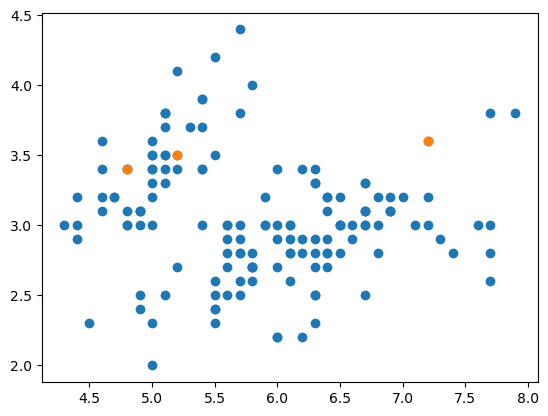

In [23]:
plt.scatter(df.X1, df.X2)
plt.scatter(init_centroid.X1, init_centroid.X2)

In [38]:
def distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2)**2))

In [26]:
for i in range(df.shape[0]):
    dist = []
    curr_x = df.iloc[i]
    
    for j in range(k):
        dis = distance(curr_x, init_centroid.iloc[j])
        dist.append(dis)
    curr_cluster = np.argmin(dist)
    # print(curr_cluster)

NameError: name 'k' is not defined

In [12]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.cluster import KMeans

# Convert DataFrame to NumPy array
data_array = df.to_numpy()

# Apply KMeans clustering
kmeans = KMeans(n_clusters=3, init='random', max_iter=5, random_state=123).fit(data_array)

# Check the centroids and labels
print("Cluster centers:", kmeans.cluster_centers_)
print("Labels:", kmeans.labels_)

Cluster centers: [[6.85       3.07368421 5.74210526 2.07105263]
 [5.006      3.418      1.464      0.244     ]
 [5.9016129  2.7483871  4.39354839 1.43387097]]
Labels: [0 0 2 0 2 0 0 1 1 1 2 2 2 2 2 1 1 0 1 1 0 2 2 1 2 1 0 1 1 2 0 1 1 1 2 2 2
 2 1 2 1 1 1 2 1 2 1 1 2 2 2 2 2 2 2 2 1 2 1 1 0 2 2 0 1 0 1 2 1 1 1 0 1 0
 1 2 2 0 2 2 1 2 0 0 0 0 1 2 2 2 1 1 2 2 0 2 2 2 2 2 0 0 0 1 0 2 0 2 2 2 1
 0 1 0 1 0 2 2 0 0 1 0 2 0 0 1 1 2 2 2 1 1 0 2 0 2 2 1 1 2 2 0 2 0 2 1 1 0
 1 1]


/Users/sungwonlee/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


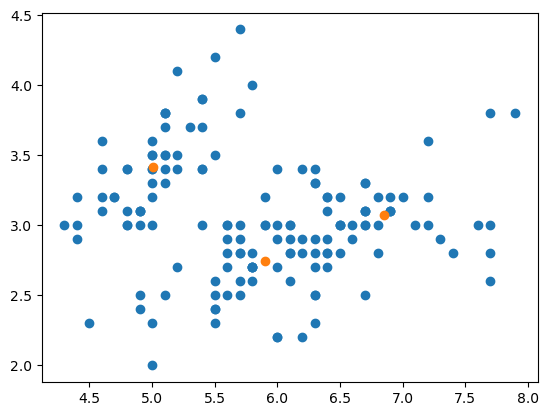

In [15]:
plt.scatter(df.X1, df.X2)
plt.scatter(kmeans.cluster_centers_[0:3,:1], kmeans.cluster_centers_[0:3,1:2])
plt.show()